In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('telecom_customer_data.csv')

In [ ]:
# Step 1: Data Preprocessing

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Handle missing values (drop rows with missing values or use imputation)
df.dropna(inplace=True)  # Here, we simply drop rows with missing values

# Convert categorical variables to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Handle outliers using IQR method
for column in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

# Feature Scaling
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])


Missing values per column:
 State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


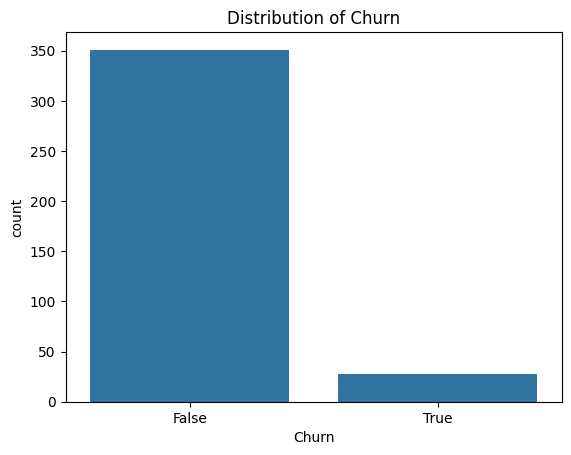

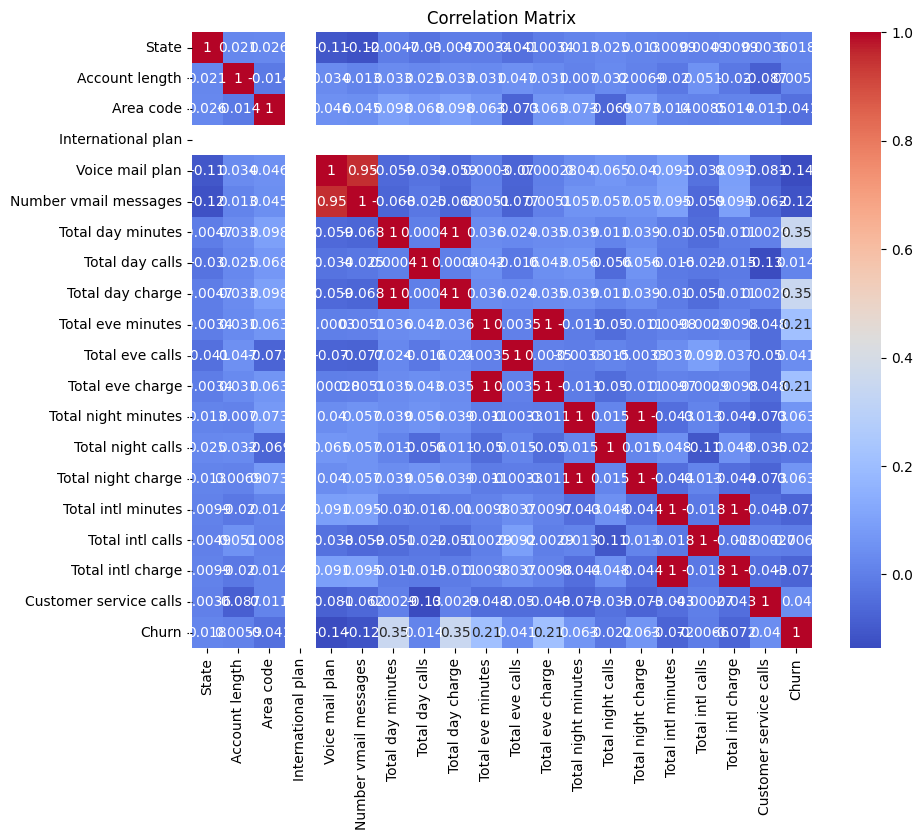

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)

# Check the balance of target classes
sns.countplot(x='Churn', data=df)
plt.title("Distribution of Churn")
plt.show()

# Correlation matrix to identify potential predictors
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Step 3: Model Building - Logistic Regression

# Split data into features and target variable
X = df.drop('Churn', axis=1)  # Assuming 'Churn' is the target column
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.91
Precision: 0.60
Recall: 0.27
F1 Score: 0.38


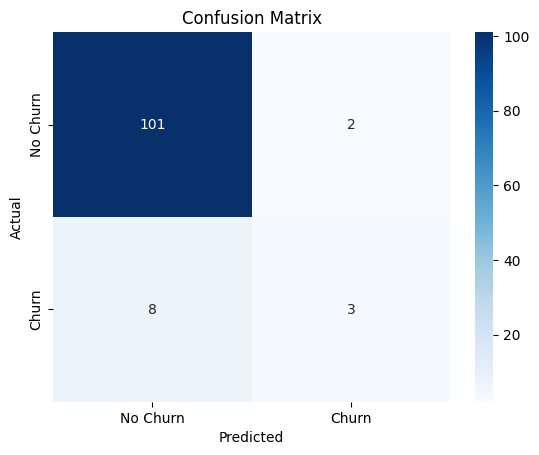

In [ ]:
# Step 4: Model Evaluation

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()